## Nuclei Segmentation

This notebook demonstrates how to segment and label nuclei in a microscopy image using the Voronoi-Otsu-Labeling algorithm.

### Step 1: Download and Save the Image

We start by downloading the image from the provided URL and saving it to the `data` folder for further processing.

In [1]:
import requests
from pathlib import Path

# Ensure the data directory exists
data_folder = Path("data")
data_folder.mkdir(exist_ok=True)

# Download the image and save it to the data folder
img_url = "https://github.com/user-attachments/assets/c1bf94c5-fe80-4ff9-a46e-d4d9cb9f276f"
img_path = data_folder / "human_mitosis.png"

response = requests.get(img_url)
with open(img_path, "wb") as file:
    file.write(response.content)


### Step 2: Load Necessary Libraries

We use the `napari-segment-blobs-and-things-with-membranes` library for segmentation and `scikit-image` for image loading and processing.

In [2]:
import napari_segment_blobs_and_things_with_membranes as nsbatwm
from skimage import color, io

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:221: UserWarning: Error in monkey patching napari. Please let @haesleinleinhuepf know at
https://github.com/haesleinhuepf/napari-tools-menu/issues
  warnings.warn("Error in monkey patching napari. Please let @haesleinleinhuepf know at\nhttps://github.com/haesleinhuepf/napari-tools-menu/issues")


### Step 3: Load the Image

Load the image we saved earlier using `skimage.io.imread`.

In [3]:
image = io.imread(str(img_path))
image.shape

(512, 512)

### Step 4: Apply Voronoi-Otsu-Labeling

Apply the Voronoi-Otsu-Labeling algorithm to segment and label the nuclei in the image.

StackViewNDArray(301, dtype=int32)
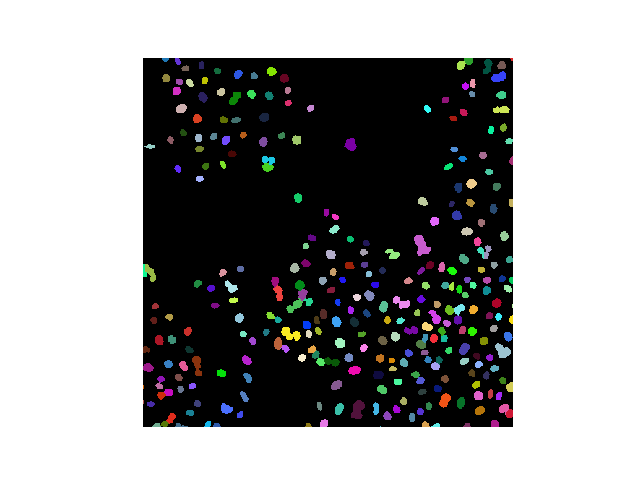

In [4]:
labeled_image = nsbatwm.voronoi_otsu_labeling(image, spot_sigma=3.5, outline_sigma=1)
labeled_image.max()

### Step 5: Convert the Label Image to RGB

Convert the label image to an RGB image where each label is represented by a different color.

In [5]:
rgb_image = color.label2rgb(labeled_image, bg_label=0)

### Step 6: Save the Resulting RGB Image

Save the RGB image as a PNG file to the `data` folder. Convert the image to uint8 before saving.

In [6]:
result_image_path = data_folder / "human_mitosis_segmented.png"
io.imsave(str(result_image_path), (rgb_image * 255).astype('uint8'))